In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Creating the dataset

In [2]:
dataSet = pd.read_csv('./dataSet/Dataset_spine.csv')

In [3]:
dataSet.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class', 'Unnamed: 13'],
      dtype='object')

In [4]:
dataSet.drop([dataSet.keys()[-1]], axis=1, inplace=True)
dataSet['target'] = dataSet['class'].apply(lambda x: 0 if x == 'Abnormal' else 1)
#dataSet

In [5]:
dataSet.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class', 'target'],
      dtype='object')

In [6]:
dataSet.drop('class', axis=1, inplace= True)

## Normalization

In [7]:
scale = StandardScaler()
scale.fit(dataSet)

dataSet = scale.transform(dataSet)

## Creating the train and test arrays

In [8]:
X = dataSet[:,0:12]
y = dataSet[:,-1]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

## Creating the MLP classifier #1

In [9]:
mlpClassifier = MLPClassifier(max_iter=1000,activation='relu', verbose=True, random_state=1)
mlpClassifier.fit(X_train, y_train)
y_pred = mlpClassifier.predict(X_test)

Iteration 1, loss = 0.71153536
Iteration 2, loss = 0.68845424
Iteration 3, loss = 0.66856531
Iteration 4, loss = 0.65018338
Iteration 5, loss = 0.63342480
Iteration 6, loss = 0.61783184
Iteration 7, loss = 0.60353344
Iteration 8, loss = 0.59042990
Iteration 9, loss = 0.57857981
Iteration 10, loss = 0.56739669
Iteration 11, loss = 0.55756424
Iteration 12, loss = 0.54811682
Iteration 13, loss = 0.53973998
Iteration 14, loss = 0.53192211
Iteration 15, loss = 0.52487241
Iteration 16, loss = 0.51823523
Iteration 17, loss = 0.51244824
Iteration 18, loss = 0.50686210
Iteration 19, loss = 0.50172321
Iteration 20, loss = 0.49696793
Iteration 21, loss = 0.49237381
Iteration 22, loss = 0.48803407
Iteration 23, loss = 0.48388570
Iteration 24, loss = 0.48004852
Iteration 25, loss = 0.47620351
Iteration 26, loss = 0.47268420
Iteration 27, loss = 0.46931103
Iteration 28, loss = 0.46603049
Iteration 29, loss = 0.46290410
Iteration 30, loss = 0.45986680
Iteration 31, loss = 0.45694571
Iteration 32, los

## Analyzing the Classifier #1

In [10]:
def analyze(targets,preds):
    hit = [True if preds[i] == targets[i] else False for i in range(len(targets))]
    hitRate = (hit.count(True)/len(hit))*100
    return hitRate

analyze(y_test, y_pred)

79.56989247311827

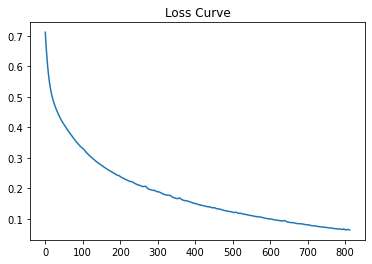

In [11]:
plt.title('Loss Curve')
plt.plot(range(len(mlpClassifier.loss_curve_)),mlpClassifier.loss_curve_)

<AxesSubplot:>

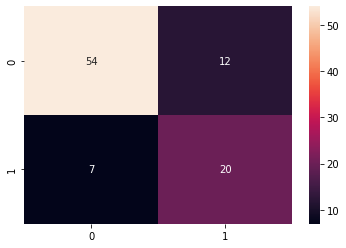

In [12]:
confMatrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(confMatrix),annot=True)

## Creating the MLP Classifire #2

In [13]:
mlpClassifier2 = MLPClassifier(max_iter=1000,activation='relu', verbose=True, hidden_layer_sizes=(15,),random_state=1)
mlpClassifier2.fit(X_train, y_train)
y_pred2 = mlpClassifier2.predict(X_test)

Iteration 1, loss = 1.04413811
Iteration 2, loss = 1.03103132
Iteration 3, loss = 1.01869998
Iteration 4, loss = 1.00663400
Iteration 5, loss = 0.99494172
Iteration 6, loss = 0.98332969
Iteration 7, loss = 0.97231050
Iteration 8, loss = 0.96151232
Iteration 9, loss = 0.95075399
Iteration 10, loss = 0.94039067
Iteration 11, loss = 0.92991170
Iteration 12, loss = 0.91993123
Iteration 13, loss = 0.90992657
Iteration 14, loss = 0.90040501
Iteration 15, loss = 0.89084888
Iteration 16, loss = 0.88173495
Iteration 17, loss = 0.87270159
Iteration 18, loss = 0.86406929
Iteration 19, loss = 0.85548709
Iteration 20, loss = 0.84697643
Iteration 21, loss = 0.83893465
Iteration 22, loss = 0.83056830
Iteration 23, loss = 0.82269022
Iteration 24, loss = 0.81469552
Iteration 25, loss = 0.80695304
Iteration 26, loss = 0.79941992
Iteration 27, loss = 0.79219324
Iteration 28, loss = 0.78504727
Iteration 29, loss = 0.77801535
Iteration 30, loss = 0.77109799
Iteration 31, loss = 0.76446092
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #2

In [14]:
analyze(y_test, y_pred2)

79.56989247311827

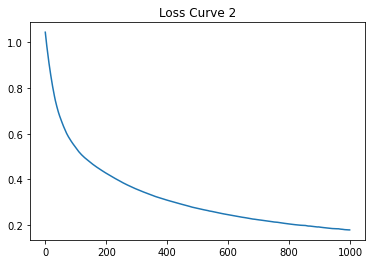

In [15]:
plt.title('Loss Curve 2')
plt.plot(range(len(mlpClassifier2.loss_curve_)),mlpClassifier2.loss_curve_)

<AxesSubplot:>

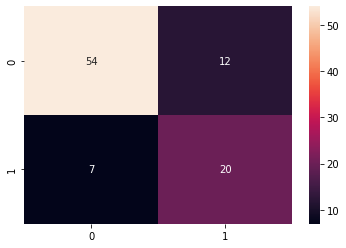

In [16]:
confMatrix2 = metrics.confusion_matrix(y_test,y_pred2)
sns.heatmap(pd.DataFrame(confMatrix2),annot=True)

## Creating the MLP Classifire #3

In [17]:
mlpClassifier3 = MLPClassifier(max_iter=2000,activation='relu', verbose=True, hidden_layer_sizes=(15,),random_state=1)
mlpClassifier3.fit(X_train, y_train)
y_pred3 = mlpClassifier3.predict(X_test)

Iteration 1, loss = 1.04413811
Iteration 2, loss = 1.03103132
Iteration 3, loss = 1.01869998
Iteration 4, loss = 1.00663400
Iteration 5, loss = 0.99494172
Iteration 6, loss = 0.98332969
Iteration 7, loss = 0.97231050
Iteration 8, loss = 0.96151232
Iteration 9, loss = 0.95075399
Iteration 10, loss = 0.94039067
Iteration 11, loss = 0.92991170
Iteration 12, loss = 0.91993123
Iteration 13, loss = 0.90992657
Iteration 14, loss = 0.90040501
Iteration 15, loss = 0.89084888
Iteration 16, loss = 0.88173495
Iteration 17, loss = 0.87270159
Iteration 18, loss = 0.86406929
Iteration 19, loss = 0.85548709
Iteration 20, loss = 0.84697643
Iteration 21, loss = 0.83893465
Iteration 22, loss = 0.83056830
Iteration 23, loss = 0.82269022
Iteration 24, loss = 0.81469552
Iteration 25, loss = 0.80695304
Iteration 26, loss = 0.79941992
Iteration 27, loss = 0.79219324
Iteration 28, loss = 0.78504727
Iteration 29, loss = 0.77801535
Iteration 30, loss = 0.77109799
Iteration 31, loss = 0.76446092
Iteration 32, los

## Analyzing the Classifier #3

In [18]:
analyze(y_test, y_pred3)

79.56989247311827

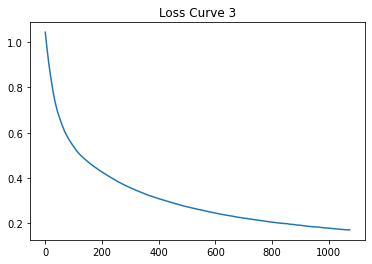

In [19]:
plt.title('Loss Curve 3')
plt.plot(range(len(mlpClassifier3.loss_curve_)),mlpClassifier3.loss_curve_)

<AxesSubplot:>

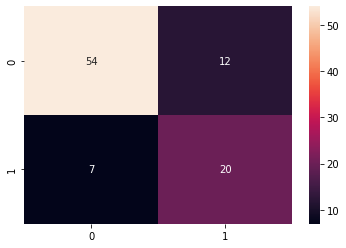

In [20]:
confMatrix3 = metrics.confusion_matrix(y_test,y_pred3)
sns.heatmap(pd.DataFrame(confMatrix3),annot=True)

## Creating the MLP Classifire #4

In [22]:
mlpClassifier4 = MLPClassifier(max_iter=2000,activation='relu', verbose=True, hidden_layer_sizes=(15,),random_state=1,learning_rate_init=0.01)
mlpClassifier4.fit(X_train, y_train)
y_pred4 = mlpClassifier4.predict(X_test)

Iteration 1, loss = 1.04078262
Iteration 2, loss = 0.91915116
Iteration 3, loss = 0.82163672
Iteration 4, loss = 0.74247299
Iteration 5, loss = 0.68051323
Iteration 6, loss = 0.63110580
Iteration 7, loss = 0.59457333
Iteration 8, loss = 0.56753875
Iteration 9, loss = 0.54587708
Iteration 10, loss = 0.52982160
Iteration 11, loss = 0.51609411
Iteration 12, loss = 0.50439755
Iteration 13, loss = 0.49363398
Iteration 14, loss = 0.48378363
Iteration 15, loss = 0.47452632
Iteration 16, loss = 0.46555753
Iteration 17, loss = 0.45737138
Iteration 18, loss = 0.44979583
Iteration 19, loss = 0.44267283
Iteration 20, loss = 0.43583789
Iteration 21, loss = 0.42874688
Iteration 22, loss = 0.42239075
Iteration 23, loss = 0.41574209
Iteration 24, loss = 0.40925842
Iteration 25, loss = 0.40301266
Iteration 26, loss = 0.39664555
Iteration 27, loss = 0.39087218
Iteration 28, loss = 0.38477284
Iteration 29, loss = 0.37916995
Iteration 30, loss = 0.37422572
Iteration 31, loss = 0.37082154
Iteration 32, los

## Analyzing the Classifier #4

In [23]:
analyze(y_test, y_pred4)

75.26881720430107

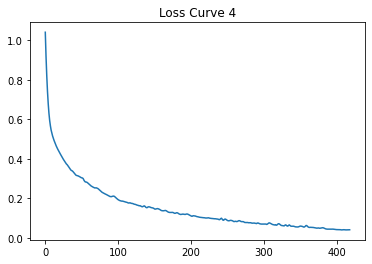

In [24]:
plt.title('Loss Curve 4')
plt.plot(range(len(mlpClassifier4.loss_curve_)),mlpClassifier4.loss_curve_)

<AxesSubplot:>

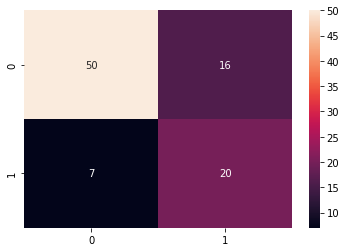

In [25]:
confMatrix4 = metrics.confusion_matrix(y_test,y_pred4)
sns.heatmap(pd.DataFrame(confMatrix4),annot=True)

## Creating the MLP Classifire #5

In [26]:
mlpClassifier5 = MLPClassifier(max_iter=2000,activation='relu', verbose=True, hidden_layer_sizes=(15,3),random_state=1,learning_rate_init=0.001)
mlpClassifier5.fit(X_train, y_train)
y_pred5 = mlpClassifier5.predict(X_test)

Iteration 1, loss = 0.79650353
Iteration 2, loss = 0.78696497
Iteration 3, loss = 0.77849627
Iteration 4, loss = 0.77070068
Iteration 5, loss = 0.76320091
Iteration 6, loss = 0.75609833
Iteration 7, loss = 0.74941939
Iteration 8, loss = 0.74287381
Iteration 9, loss = 0.73671752
Iteration 10, loss = 0.73095124
Iteration 11, loss = 0.72530121
Iteration 12, loss = 0.72028822
Iteration 13, loss = 0.71492184
Iteration 14, loss = 0.71006057
Iteration 15, loss = 0.70510713
Iteration 16, loss = 0.70050926
Iteration 17, loss = 0.69581469
Iteration 18, loss = 0.69161255
Iteration 19, loss = 0.68731577
Iteration 20, loss = 0.68316527
Iteration 21, loss = 0.67899828
Iteration 22, loss = 0.67485210
Iteration 23, loss = 0.67092627
Iteration 24, loss = 0.66686230
Iteration 25, loss = 0.66298534
Iteration 26, loss = 0.65927977
Iteration 27, loss = 0.65557346
Iteration 28, loss = 0.65195820
Iteration 29, loss = 0.64841033
Iteration 30, loss = 0.64476506
Iteration 31, loss = 0.64136171
Iteration 32, los

## Analyzing the Classifier #5

In [27]:
analyze(y_test, y_pred5)

80.64516129032258

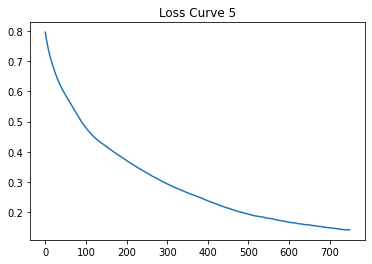

In [28]:
plt.title('Loss Curve 5')
plt.plot(range(len(mlpClassifier5.loss_curve_)),mlpClassifier5.loss_curve_)

<AxesSubplot:>

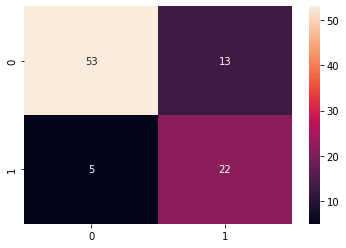

In [29]:
confMatrix5 = metrics.confusion_matrix(y_test,y_pred5)
sns.heatmap(pd.DataFrame(confMatrix5),annot=True)

## Creating the MLP Classifire #6

In [30]:
mlpClassifier6 = MLPClassifier(max_iter=2000,activation='relu', verbose=True, hidden_layer_sizes=(15,6),random_state=1,learning_rate_init=0.001)
mlpClassifier6.fit(X_train, y_train)
y_pred6 = mlpClassifier6.predict(X_test)

Iteration 1, loss = 0.74244995
Iteration 2, loss = 0.73334325
Iteration 3, loss = 0.72484460
Iteration 4, loss = 0.71707606
Iteration 5, loss = 0.70953435
Iteration 6, loss = 0.70218292
Iteration 7, loss = 0.69544779
Iteration 8, loss = 0.68870399
Iteration 9, loss = 0.68257413
Iteration 10, loss = 0.67681234
Iteration 11, loss = 0.67135059
Iteration 12, loss = 0.66621138
Iteration 13, loss = 0.66136879
Iteration 14, loss = 0.65680814
Iteration 15, loss = 0.65267354
Iteration 16, loss = 0.64833030
Iteration 17, loss = 0.64471035
Iteration 18, loss = 0.64100206
Iteration 19, loss = 0.63749502
Iteration 20, loss = 0.63410725
Iteration 21, loss = 0.63093299
Iteration 22, loss = 0.62794854
Iteration 23, loss = 0.62490905
Iteration 24, loss = 0.62190452
Iteration 25, loss = 0.61893084
Iteration 26, loss = 0.61608321
Iteration 27, loss = 0.61308852
Iteration 28, loss = 0.61032659
Iteration 29, loss = 0.60754311
Iteration 30, loss = 0.60521176
Iteration 31, loss = 0.60272921
Iteration 32, los

## Analyzing the Classifier #6

In [31]:
analyze(y_test, y_pred6)

79.56989247311827

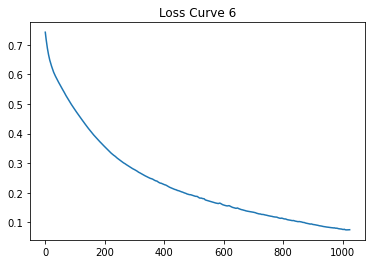

In [32]:
plt.title('Loss Curve 6')
plt.plot(range(len(mlpClassifier6.loss_curve_)),mlpClassifier6.loss_curve_)

<AxesSubplot:>

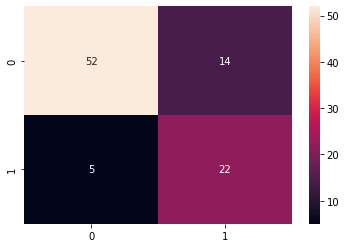

In [33]:
confMatrix6 = metrics.confusion_matrix(y_test,y_pred6)
sns.heatmap(pd.DataFrame(confMatrix6),annot=True)

## Creating the MLP Classifire #7

In [34]:
mlpClassifier7 = MLPClassifier(max_iter=2000,activation='relu', verbose=True, hidden_layer_sizes=(200,),random_state=1,learning_rate_init=0.001)
mlpClassifier7.fit(X_train, y_train)
y_pred7 = mlpClassifier7.predict(X_test)

Iteration 1, loss = 0.63837118
Iteration 2, loss = 0.61485584
Iteration 3, loss = 0.59497575
Iteration 4, loss = 0.57803542
Iteration 5, loss = 0.56274258
Iteration 6, loss = 0.54978820
Iteration 7, loss = 0.53810396
Iteration 8, loss = 0.52796557
Iteration 9, loss = 0.51869406
Iteration 10, loss = 0.51085741
Iteration 11, loss = 0.50326898
Iteration 12, loss = 0.49699277
Iteration 13, loss = 0.49121515
Iteration 14, loss = 0.48571616
Iteration 15, loss = 0.48095659
Iteration 16, loss = 0.47601943
Iteration 17, loss = 0.47152075
Iteration 18, loss = 0.46690501
Iteration 19, loss = 0.46223107
Iteration 20, loss = 0.45757267
Iteration 21, loss = 0.45317530
Iteration 22, loss = 0.44876030
Iteration 23, loss = 0.44461829
Iteration 24, loss = 0.44063107
Iteration 25, loss = 0.43656671
Iteration 26, loss = 0.43287694
Iteration 27, loss = 0.42951171
Iteration 28, loss = 0.42600997
Iteration 29, loss = 0.42297505
Iteration 30, loss = 0.42038960
Iteration 31, loss = 0.41749683
Iteration 32, los

## Analyzing the Classifier #7

In [35]:
analyze(y_test, y_pred7)

79.56989247311827

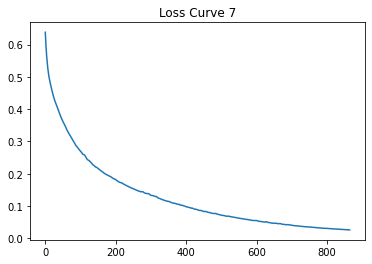

In [36]:
plt.title('Loss Curve 7')
plt.plot(range(len(mlpClassifier7.loss_curve_)),mlpClassifier7.loss_curve_)

<AxesSubplot:>

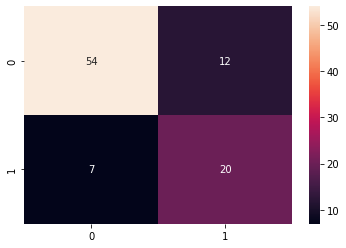

In [39]:
confMatrix7 = metrics.confusion_matrix(y_test,y_pred7)
sns.heatmap(pd.DataFrame(confMatrix7),annot=True)

## Creating the MLP Classifire #8

In [37]:
mlpClassifier8 = MLPClassifier(max_iter=500,activation='relu', verbose=True, hidden_layer_sizes=(200,),random_state=1,learning_rate_init=0.001)
mlpClassifier8.fit(X_train, y_train)
y_pred8 = mlpClassifier8.predict(X_test)

Iteration 1, loss = 0.63837118
Iteration 2, loss = 0.61485584
Iteration 3, loss = 0.59497575
Iteration 4, loss = 0.57803542
Iteration 5, loss = 0.56274258
Iteration 6, loss = 0.54978820
Iteration 7, loss = 0.53810396
Iteration 8, loss = 0.52796557
Iteration 9, loss = 0.51869406
Iteration 10, loss = 0.51085741
Iteration 11, loss = 0.50326898
Iteration 12, loss = 0.49699277
Iteration 13, loss = 0.49121515
Iteration 14, loss = 0.48571616
Iteration 15, loss = 0.48095659
Iteration 16, loss = 0.47601943
Iteration 17, loss = 0.47152075
Iteration 18, loss = 0.46690501
Iteration 19, loss = 0.46223107
Iteration 20, loss = 0.45757267
Iteration 21, loss = 0.45317530
Iteration 22, loss = 0.44876030
Iteration 23, loss = 0.44461829
Iteration 24, loss = 0.44063107
Iteration 25, loss = 0.43656671
Iteration 26, loss = 0.43287694
Iteration 27, loss = 0.42951171
Iteration 28, loss = 0.42600997
Iteration 29, loss = 0.42297505
Iteration 30, loss = 0.42038960
Iteration 31, loss = 0.41749683
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #8

In [38]:
analyze(y_test, y_pred8)

77.41935483870968

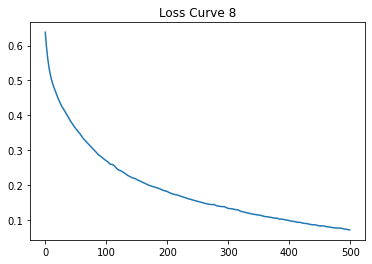

In [40]:
plt.title('Loss Curve 8')
plt.plot(range(len(mlpClassifier8.loss_curve_)),mlpClassifier8.loss_curve_)

<AxesSubplot:>

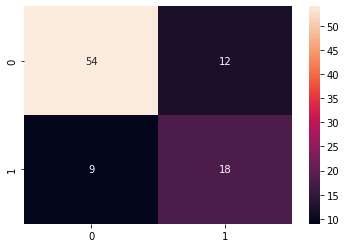

In [41]:
confMatrix8 = metrics.confusion_matrix(y_test,y_pred8)
sns.heatmap(pd.DataFrame(confMatrix8),annot=True)

## Creating the MLP Classifire #9

In [42]:
mlpClassifier9 = MLPClassifier(max_iter=250,activation='relu', verbose=True, hidden_layer_sizes=(200,),random_state=1,learning_rate_init=0.001)
mlpClassifier9.fit(X_train, y_train)
y_pred9 = mlpClassifier9.predict(X_test)

Iteration 1, loss = 0.63837118
Iteration 2, loss = 0.61485584
Iteration 3, loss = 0.59497575
Iteration 4, loss = 0.57803542
Iteration 5, loss = 0.56274258
Iteration 6, loss = 0.54978820
Iteration 7, loss = 0.53810396
Iteration 8, loss = 0.52796557
Iteration 9, loss = 0.51869406
Iteration 10, loss = 0.51085741
Iteration 11, loss = 0.50326898
Iteration 12, loss = 0.49699277
Iteration 13, loss = 0.49121515
Iteration 14, loss = 0.48571616
Iteration 15, loss = 0.48095659
Iteration 16, loss = 0.47601943
Iteration 17, loss = 0.47152075
Iteration 18, loss = 0.46690501
Iteration 19, loss = 0.46223107
Iteration 20, loss = 0.45757267
Iteration 21, loss = 0.45317530
Iteration 22, loss = 0.44876030
Iteration 23, loss = 0.44461829
Iteration 24, loss = 0.44063107
Iteration 25, loss = 0.43656671
Iteration 26, loss = 0.43287694
Iteration 27, loss = 0.42951171
Iteration 28, loss = 0.42600997
Iteration 29, loss = 0.42297505
Iteration 30, loss = 0.42038960
Iteration 31, loss = 0.41749683
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #9

In [43]:
analyze(y_test, y_pred9)

82.79569892473118

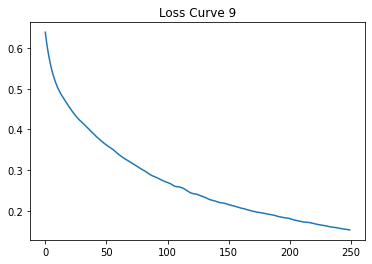

In [44]:
plt.title('Loss Curve 9')
plt.plot(range(len(mlpClassifier9.loss_curve_)),mlpClassifier9.loss_curve_)

<AxesSubplot:>

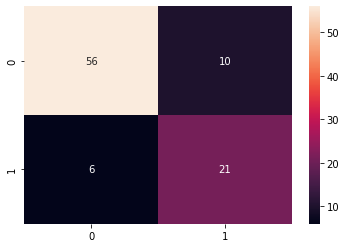

In [45]:
confMatrix9 = metrics.confusion_matrix(y_test,y_pred9)
sns.heatmap(pd.DataFrame(confMatrix9),annot=True)

## Creating the MLP Classifire #10

In [49]:
mlpClassifier10 = MLPClassifier(max_iter=300,activation='relu', verbose=True, hidden_layer_sizes=(200,),random_state=1,learning_rate_init=0.001,solver='sgd')
mlpClassifier10.fit(X_train, y_train)
y_pred10 = mlpClassifier10.predict(X_test)

Iteration 1, loss = 0.63936500
Iteration 2, loss = 0.63830439
Iteration 3, loss = 0.63664177
Iteration 4, loss = 0.63441776
Iteration 5, loss = 0.63180256
Iteration 6, loss = 0.62895949
Iteration 7, loss = 0.62593565
Iteration 8, loss = 0.62284214
Iteration 9, loss = 0.61965378
Iteration 10, loss = 0.61643781
Iteration 11, loss = 0.61316922
Iteration 12, loss = 0.61001294
Iteration 13, loss = 0.60699637
Iteration 14, loss = 0.60403327
Iteration 15, loss = 0.60123308
Iteration 16, loss = 0.59841165
Iteration 17, loss = 0.59576090
Iteration 18, loss = 0.59314862
Iteration 19, loss = 0.59060880
Iteration 20, loss = 0.58812025
Iteration 21, loss = 0.58572072
Iteration 22, loss = 0.58339556
Iteration 23, loss = 0.58118499
Iteration 24, loss = 0.57907363
Iteration 25, loss = 0.57707328
Iteration 26, loss = 0.57516188
Iteration 27, loss = 0.57333258
Iteration 28, loss = 0.57155343
Iteration 29, loss = 0.56984862
Iteration 30, loss = 0.56819187
Iteration 31, loss = 0.56649457
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #10

In [54]:
analyze(y_test, y_pred10)

78.49462365591397